## Import dependencies and data

In [1]:
#import dependencies
import pandas as pd
import json
import matplotlib.pyplot as plt


In [2]:
path = "../data/data.json"

In [3]:
# Opening JSON file
f = open(path)
  
# returns JSON object as a dictionary
data = json.load(f)

In [4]:
#check that the data imported correctly
data[0]

{'id': 1,
 'title': 'Data Analyst',
 'company_name': 'Applicantz',
 'location': 'Anywhere',
 'via': 'via LinkedIn',
 'description': 'Open to work on W2 or on Corp-to-Corp (for visa candidates). THIS IS A LONG TERM CONTRACT POSITION WITH ONE OF THE LARGEST, GLOBAL, TECHNOLOGY LEADER. Remote work.\n\nOur Client is a Fortune 350 company that engages in the design, manufacturing, marketing, and service of semiconductor processing equipment. Looking for a Data Analyst that knows Power BI very well and has 3-5 years of... experience\n\nSkills\n• Strong mathematical skills to help collect, measure, organize and analyze data\n• Adept at queries, writing reports, and making presentations\n• Proven working experience in data analysis\n• Knowledge of data visualization software like Qlik and must know PowerBI\n• Problem-solving skills\n• Accuracy and attention to detail\n• Team-working skills\n\nRoles and Responsibilities:\n• Using automated tools to extract data from primary and secondary source

In [5]:
# Closing file
f.close()

#### Converting the json to a dataframe for analysis

In [6]:
df = pd.read_json(path)
df.head()

,id,title,company_name,location,via,description,extensions,schedule_type,work_from_home,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,1,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",Contractor,TRUE,,,NaN,"['qlik', 'power_bi', 'power_bi']"
1,2,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,NaN,['excel']
2,3,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",Full-time,,,,NaN,"['sas', 'snowflake', 'excel', 'power_bi', 'pyt..."
3,4,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],,,,,NaN,"['excel', 'tableau', 'cognos', 'sql', 'word']"
4,5,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,NaN,"['pandas', 'sql', 'tableau', 'word', 'power_bi..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10497 non-null  int64  
 1   title                10497 non-null  object 
 2   company_name         10497 non-null  object 
 3   location             10497 non-null  object 
 4   via                  10497 non-null  object 
 5   description          10497 non-null  object 
 6   extensions           10497 non-null  object 
 7   schedule_type        10497 non-null  object 
 8   work_from_home       10497 non-null  object 
 9   salary_hourly        10497 non-null  object 
 10  salary_yearly        10497 non-null  object 
 11  salary_standardized  2103 non-null   float64
 12  description_tokens   10497 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


## Work From Home vs. In Office Postings

In [8]:
remote_df = df['work_from_home'].value_counts().rename_axis('wfh').reset_index(name='count')
remote_df['type'] = ['Remote', 'In Office']
remote_df = remote_df.set_index('type')
remote_df

,wfh,count
type,,
Remote,,5614
In Office,TRUE,4883


<Figure size 1152x864 with 0 Axes>

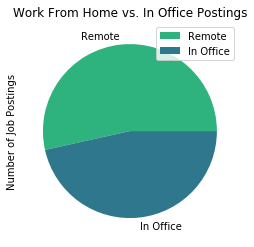

In [9]:
plt.figure(figsize=(16,12))
remote_df.plot.pie(y='count', colors = ['#2eb37e', '#2e778d'])
plt.title('Work From Home vs. In Office Postings')
plt.ylabel('Number of Job Postings')
plt.savefig('../static/images/wfh_office.png', bbox_inches = 'tight')
plt.show()

## Salary Standardized to Yearly Pay

/Users/kimsernett/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kimsernett/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


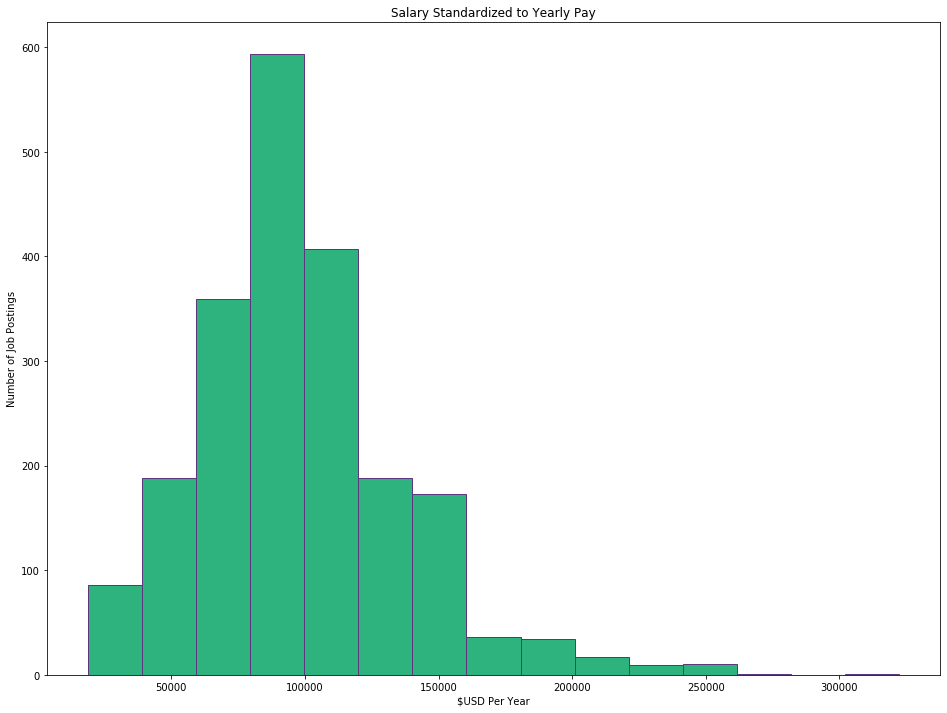

In [10]:
salary_list = list(df['salary_standardized'])

plt.figure(figsize=(16,12))
plt.hist(salary_list, bins = 15, color = "#2EB37E", ec="#5C367F")
plt.title('Salary Standardized to Yearly Pay')
plt.ylabel('Number of Job Postings')
plt.xlabel('$USD Per Year')
plt.savefig('../static/images/salary_standardized.png', bbox_inches = 'tight')
plt.show()

## Number of Postings Per Job Title (Top 10)

In [11]:
title_df = df['title'].value_counts()
title_df

Data Analyst                                                          1124
Senior Data Analyst                                                    398
Lead Data Analyst                                                      233
Sr. Data Analyst, Marketing Operations                                 203
Data Analyst II                                                        196
                                                                      ... 
Excel template developer                                                 1
Ghostwriter-methodology, analysis and results for research project       1
Data Scientist with Shinny and Pharma Exp - W2 CTH - Remote EST          1
Tableau developer/data analyst - Contract to Hire                        1
Jr Data Analyst (Training Provided)                                      1
Name: title, Length: 4283, dtype: int64

In [12]:
#convert all job titles to lowercase to account for inconsistencies in casing
df['title'] = df['title'].str.lower()
#convert to title case
df['title'] = df['title'].str.title()
title_lc_df = df['title'].value_counts()
title_lc_df.head(10)

Data Analyst                                   1177
Senior Data Analyst                             408
Lead Data Analyst                               233
Data Analyst Ii                                 223
Sr. Data Analyst, Marketing Operations          203
Business Data Analyst                           137
Senior Data Analyst, Business Optimization       99
Data Scientist                                   97
Junior Data Analyst                              60
Senior Performance Marketing (Data Analyst)      59
Name: title, dtype: int64

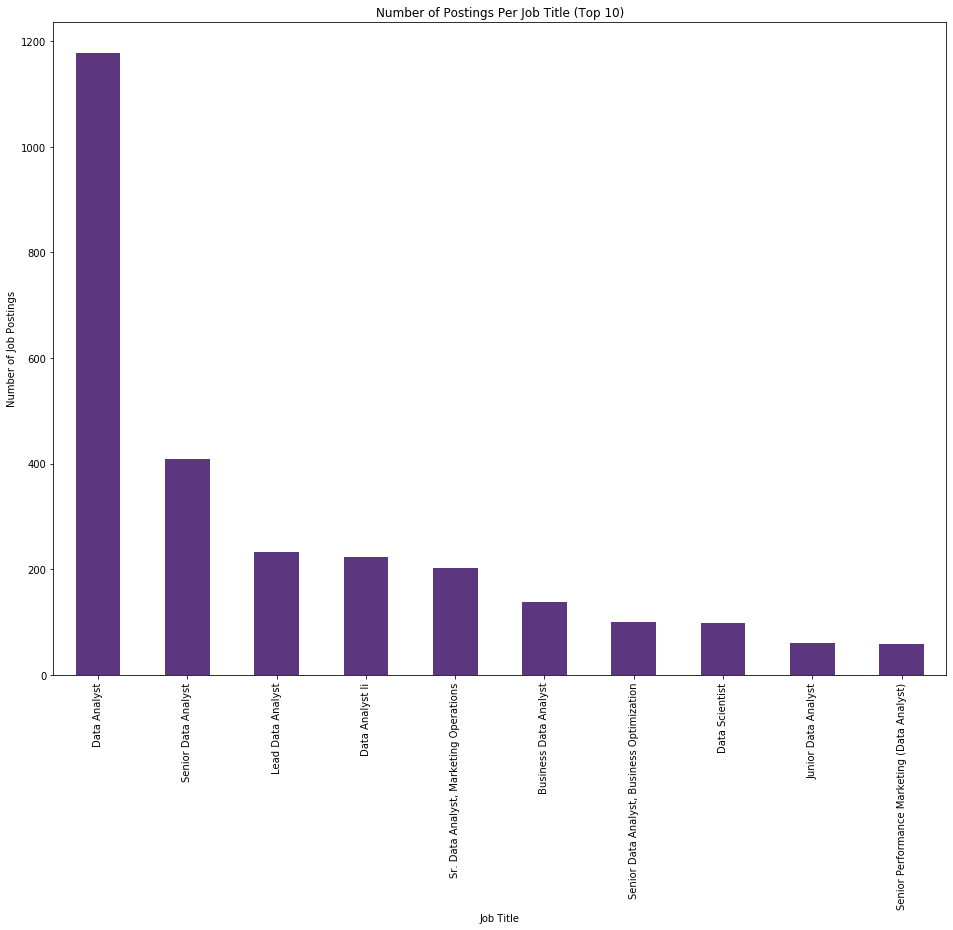

In [13]:
#filter top 10 job titles
top_ten_titles = title_lc_df.head(10)
plt.figure(figsize=(16,12))
top_ten_titles.plot(kind='bar', color= '#5C367F')
plt.ylabel('Number of Job Postings')
plt.xlabel('Job Title')
plt.title('Number of Postings Per Job Title (Top 10)')
#plt.xticks(rotation = 45)
plt.savefig('../static/images/postings_per_title.png', bbox_inches = 'tight')
plt.show()

Title vs Salary comparison

In [14]:
#create new dataframe with only the job title and salary information for comparison
title_salary_df = df[['title', 'salary_standardized']]
title_salary_df

,title,salary_standardized
0,Data Analyst,NaN
1,Data Analyst I (Remote Optional),NaN
2,Data Analyst Ii,NaN
3,Data Analyst,NaN
4,"Senior Data Analyst [Remote Or San Diego, Ca]",NaN
...,...,...
10492,Intern - Data Analytics,NaN
10493,Google Analytics Consultant,63440.0
10494,Expert In Google Sheets Needed To Create A Sim...,46800.0
10495,Google Analytics Specialist Troubleshoot Issue,145600.0


In [15]:
#drop NaN values from salary column
title_salary_df = title_salary_df.dropna()
title_salary_df


,title,salary_standardized
6,Data Analyst,43680.0
8,Lead-Data Analyst,144481.5
11,Lead-Data Analyst,144481.5
13,Associate Data Analyst,55000.0
17,Lead-Data Analyst,144481.5
...,...,...
10491,Hiring Rockstar Google Analytics Implementatio...,62400.0
10493,Google Analytics Consultant,63440.0
10494,Expert In Google Sheets Needed To Create A Sim...,46800.0
10495,Google Analytics Specialist Troubleshoot Issue,145600.0


In [16]:
#filter by the top ten job titles and gather average salary info
title_for_ave = ['Data Analyst', 'Senior Data Analyst', 'Lead Data Analyst', 'Data Analyst Ii', 'Sr. Data Analyst, Marketing Operations', 'Business Data Analyst', 'Senior Data Analyst, Business Optimization', 'Data Scientist', 'Junior Data Analyst', 'Senior Performance Marketing (Data Analyst)']
ave_salary = []

for t in title_for_ave:
    filter = title_salary_df.loc[title_salary_df['title'] == t]
    ave_salary.append(filter['salary_standardized'].mean())


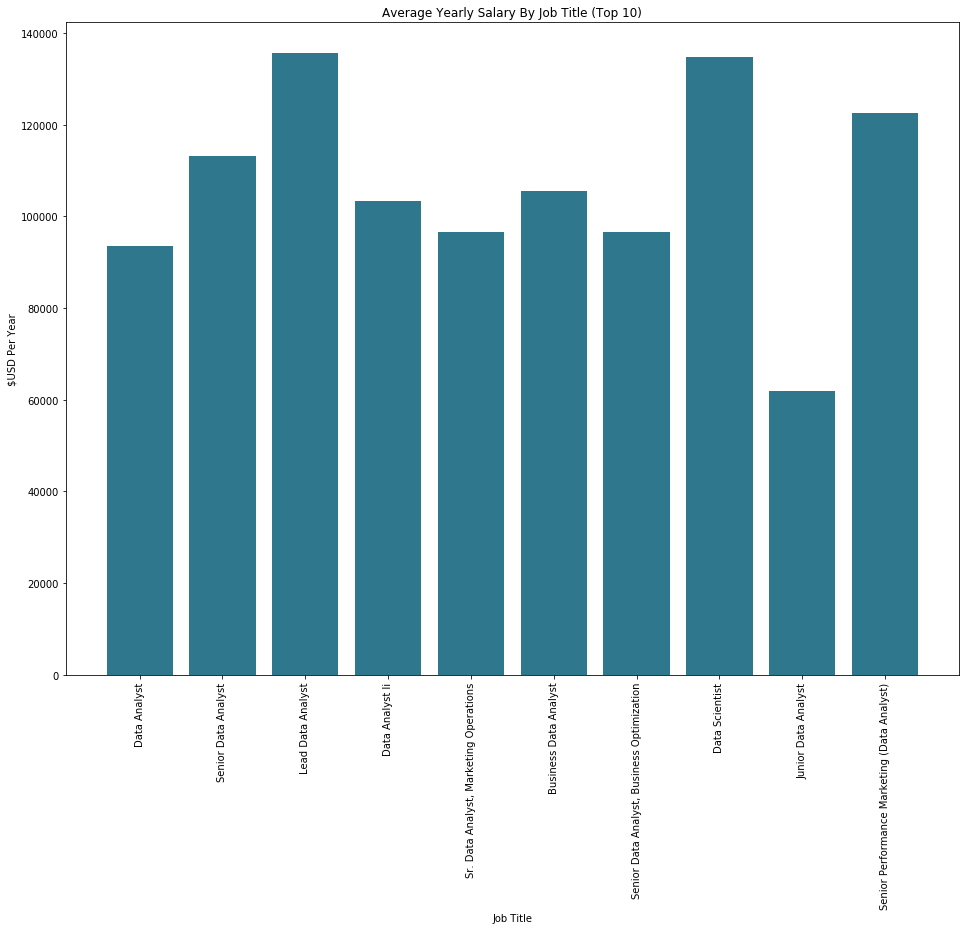

In [17]:
plt.figure(figsize=(16,12))
plt.bar(title_for_ave, ave_salary, color = '#2E778D')
plt.ylabel('$USD Per Year')
plt.xlabel('Job Title')
plt.title('Average Yearly Salary By Job Title (Top 10)')
plt.xticks(rotation = 90)
plt.savefig('../static/images/salary_per_title.png',bbox_inches = 'tight')
plt.show()